# Etiquetas raras o categorías poco comunes

## Etiquetas que ocurren raramente

Las variables categóricas son aquellas cuyos valores son seleccionados de un grupo de categorías,tambien conocidas como etiquetas. Diferentes etiquetas aparacen en un conjunto de datos con diferentes frecuencias. Mientras algunas categorias aparecen frecuentemente, otras categorias aparecen solamente en unas pocas observaciones.

Por ejemplo, si tenemos datos con información acerca de aplicantes para préstamos, una variables como 'ciudad' (lugar donde vive el aplicante), ciudades como 'Nueva York'pueden aparecen varias veces dado su gran número de habitantes, pero pueblos mas pequenos como 'Leavenworth' apareceran solo en unas pocas ocasiones data su pequena población (< 2000 personas).  Un prestamista, es mas probable que viva en Nueva York que en Leavenworth

De hecho, las variables categóricas frecuentemente contienen unas pocas categorías que son dominantes y que representan la mayoría de las observaciones y un gran número de categorías o etiquetas que rara vez aparecen.

### Son éstas etiquetas poco comunes en una variable categórica un problema?

Estos valores poco comunes o raros puede que tengan un gran valor predictivo o por el contrario, ninguno. Por ejemplo, considera una reunión de accionistas donde cada persona puede votar en proporción a su número de acciones. Uno de los accionista tiene el 50% de las acciones y los otros 99 accionistas tienen el 50% restante. El resultado del voto estaría ampliamente influenciado por el accionista que tiene la mayoría de las acciones. Los demás accionistas podrían tener algo de influencia solamente si se les considera en grupo, pero no individualmente.

Lo mismo sucede con conjuntos de datos reales. Las etiquetas de las categorías sobre-representadas tienden a dominar los resultados, mientras que aquellas que estan sub-representadas solo tienen impacto cuando se les consideran collectivamente.

Más específicamente,

- Los valores raros o pocos comunes en variables categóricas tienden a causer sobreajustes, particularmente en algoritmos basados en **árboles de decisión**.

- Cuando el número de etiquetas poco frecuentes es considerable, se añade ruido en el modelo predictivo, causando sobreajustes.

- Etiquetas poco comunes pueden estar presentes en los datos para entrenar el modelo, pero no en los de prueba, por lo tanto causando que el modelo este sobreajustado para los datos de entrenamiento.

- Las etiquetas raras pueden aparecer en los datos de prueba, pero no en los usados para entrenar el modelo. Por lo tanto, el modelo de machine learning no sabe como evaluarlas.

**Nota** En algunas ocasiones, los valores poco comunes son de hecho importantes. Por ejemplo, si estamos construyendo un modelo predictivo para detectar applicaciones fraudulentas, un evento que es de por si poco común, una variable con ciertos valores raros puede ser de gran valor predictivo.  Este valor poco común puede ser un indicativo que la observación es probablemente una applicación fraudulenta, y por lo tanto no debemos ignorarla.


## En este Demo:

Lograremos:

- Aprender a indentificar eventos raros o poco comunes en un conjunto de datos
- Entender que tan difícil es extraer información confiable de estas categorías
- Visualizar las distribuciones desiguales que las etiquetas raras que apacen datos de entrenamiento y de prueba

En este demo, usaremos datos de la companía financiera especializada en préstamos peer-to-peer llamada **Lending Club** 

- Para descargar los datos, por favor referirse a la sección de **Datos** de la **Clase 1** del curso.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to separate data intro train and test sets
from sklearn.model_selection import train_test_split

In [2]:
# Carguemos los datos con solo unas columnas.

# Definición de variables:
#-------------------------

# Neighborhood: Localidad 
# Exterior1st: Material cubriendo el exterior de la casa 
# Exterior2nd: Material cubriendo el exterior de la casa (si hay más de un material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [3]:
# Miremos las diferentes categorías
# en cada una de las variables (cardinalidad)

# Estas son las variables categóricas 
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' número de etiquetas: ', data[col].nunique())

print('Número total de casas: ', len(data))

variable:  Neighborhood  número de etiquetas:  25
variable:  Exterior1st  número de etiquetas:  15
variable:  Exterior2nd  número de etiquetas:  16
Número total de casas:  1460


La variable 'Neighborhood' muestra 25 valores diferentes, 'Exterior1st' 15, y 'Exterior2nd' 16 categorías.

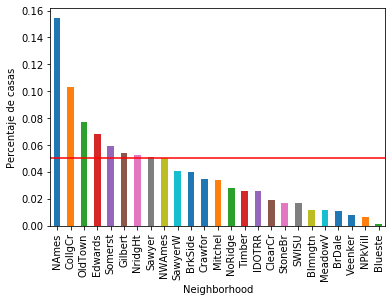

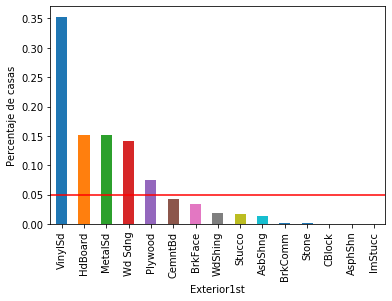

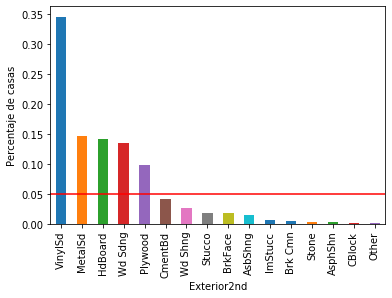

In [4]:
# Grafiquemos que tan frecuentemente aparece
# cada categoría en los datos.


total_houses = len(data)

# For cada categoria
for col in cat_cols:

    # contar el número de casas por cada categoría
    # y dividir por el número total de casas

    # aka porcentaje de casas por cada categoría 

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # Creemos una gráfica con los porcentajes anteriores 
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Una línea al 5 % marca el threshold para las categorias poco comunes
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentaje de casas')
    plt.show()

Por cada variable categórica, algunas de las etiquetas aparecen en mas del 10% de las casas y muchas otras en solo el 10% o hasta el 5% de las casas.
Estas etiquetas que son menos ferqucence son los **Valores raros o poco comunes** y pueden causar sobreajustes.

### Como se relaciona la variable objetivo o target, "SalePrice",  con estas categorías?

En las siguientes celdas, vamos a explorar el precio de venta 'SalePrice' para cada grupo de casas que despliega estas categorías.

Continua leyendo, para entender mejor

In [5]:
# Las siguientes funciones calculan:

# 1) el porcentaje de casas por categoría 
# 2) el precio promedio de venta por categoría 'SalePrice' 


def calculate_mean_target_per_category(df, var):

    # número total de casas
    total_houses = len(df)

    # porcenaje de casas por categoría
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # precio promedio
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [6]:
# Ahora usamos la funcíon applicada a la variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


El dataframe contiene el porcentaje de casas que muestran cada una de las etiquetas en un barrio/sector Neighborhood, y el precio promedio SalePrice por cada grupo de casas. En otras palabras, ~15% de las casas estan en un sector llamado NAmes y el precio promedio de venta es  a USD 145,847.

In [7]:
# Creemos una función para graficar
# la frecuencia por categoria y el precio promedio

# Esto ayudará a visualizar la relación entre el target y las 
# etiquetas de la variable categórica 

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('porcentaje de casas por categoría')
    ax.set_xlabel(var)
    ax2.set_ylabel('Precio promedio SalePrice por categoría')
    plt.show()

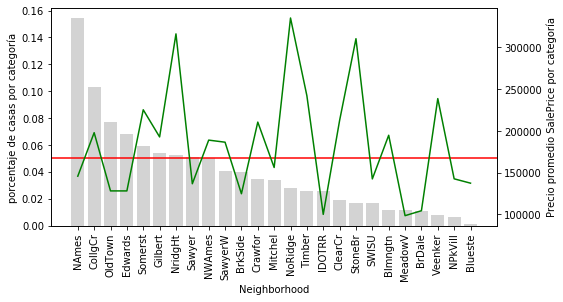

In [8]:
plot_categories(temp_df, 'Neighborhood')

Las casas en el sector 'NridgHt' se venden a un mayor preico, mientras que las casas en 'Sawyer' tienden a ser más baratas.

Las casas en el barrio o 'Neighborhood de 'StoneBr' tienen en promedio, precios promedio de venta altos, encima de 300k. Sin embargo, 'StoneBr' esta presente en menos del 5% de las casas. En otras palabras, menos del 5% de las casas en los datos estan en 'StoneBr'.

Por qué es esto importante? Porque si no tenemos suficientes datos de casas de los cuales el modelo pueda aprender, podriamos sobre-estimar el efecto de 'StoneBr' en el precio de venta SalePrice.

Qué tan confidentes estamos de poder generalizar que la mayoria de las casas en StoneBr se venderán por alrededor de 300k, cuando solo tenemos unas pocas casas de donde un algortimo puede aprender?

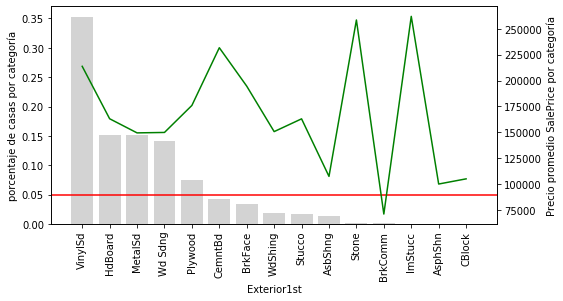

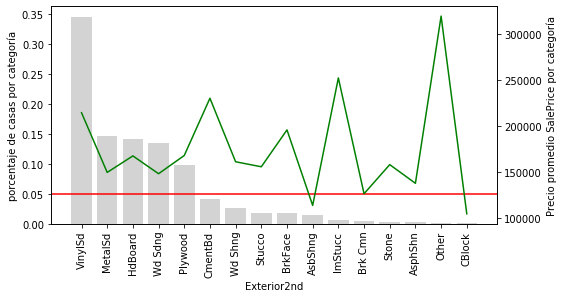

In [9]:
# Grafiquemos las variables categóricas restantes

for col in cat_cols:
    
    if col !='Neighborhood':
        
        # usemos las funciones que ya creamos
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)

Exploremos la variable 'Exterior2nd': la mayoria de las categorías en  Exterior2nd estan presentes en menos del 5% de las casas. Además, el precio de venta "SalePrice" varia significativamente entas categorías raras. Estas etiquetas poco comunes podrian tener un gran valor predictivo, o podrian estar introduciendo ruido. Ya que estas categorias poco comunes esta sub-representadas, no podemos estar seguros del impacto real que tienen en el precio de una casas. Bien podriamos sobre- o sub- estimar su impacto datdo que tenemos información de unas solas casas.

**Nota:** Esta gráfica seria de mayor ayuda si anadimos los errores en el precio de venta, ya que nos daria una idea de cuanto el valor de la variable objectivo 'SalePrice' varia en cada categoría.  Por qué no intentas graficar la desviación estardard?


### Etiquetas raras: agrupando con una nueva categoría

Una forma de manipular los valores poco frecuentes o raros, es agruparlos en una nueva categoría sombrilla llamada 'Rara' o 'Otra'. De esta forma, se puede entender el efecto collectivo que estas etiquetes poco comunes tienen en el precio de venta (target). 


In [1]:
# Reemplacemos todas las categorias que aparecen en menos del 
# 5% de las casas con la etiqueta 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # primero calculemos el % de csas por cada categoria 
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # ahora creemos un diccionario que reemplace las categorias raras
    # con la cadena 'rare' si estan presentes en menos del 5% de las casas
    
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # reemplacemos las etiquetas raras
    tmp = df[var].map(grouping_dict)

    return tmp

In [11]:
# Agrupemos las categorias raras en 'Neighborhood'

data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


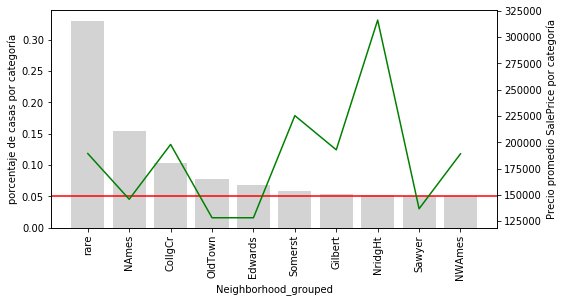

In [12]:
# Grafiquemos las categorias en Neighborhood 

temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

La categoria "Rare" ahora encapsula toda la influencia de todas las categorias poco comunes en el precio final de venta.


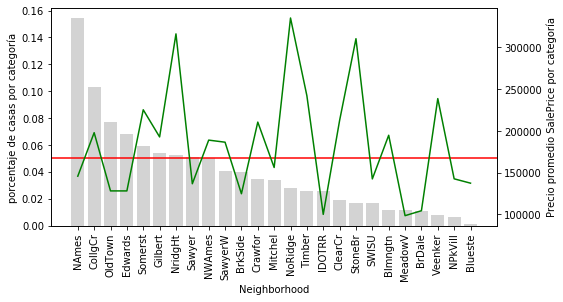

In [13]:
# Grafiquemos los datos originales de  'Neighborhood' para comparar
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Solo 9 categorias de Neighborhood son relativamente comunes en los datos. Las categorias restantes, ahora estan agrupadas en 'Rare'


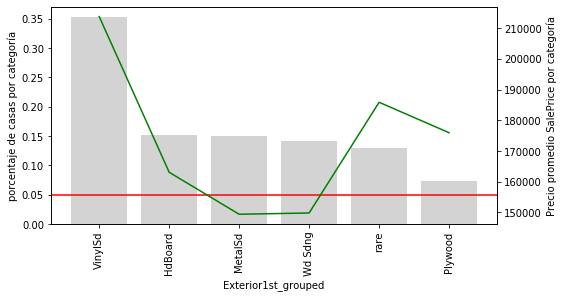

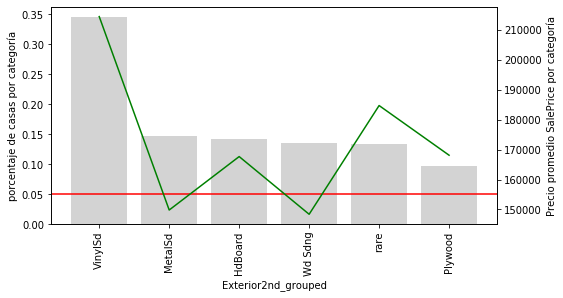

In [14]:
# agrupemos y grafiquemos las otras variables categóricas

for col in cat_cols[1:]:
        
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Aqui hay algo interesante: en la variable Exterior1st, las casas con valores poco comunes son en promedio mas costosas, excepto por aquellas con 'VinySd'.

Lo mismo es cierto para 'Exterior2nd'. Estas categorias raras parecen tener algo en común.

**Nota:** Idealmente, podriamos agregar la desviación estandar / o el rango inter-cuartil al precio de venta SalePrice, para darnos una idea de como varia el precio en cada categoría


### Etiquetas raras llevan a distribuciones irregulares de las categorias en los conjuntos de datos para entrenamiento y prueba

En las variables de alta cardinalidad, las categorias raras o poco comunes tienden solo a estar presente en los datos para entrenar el modelo, lo cual lleva a sobreajustes en el mismo. Si por el contrario,estan solo presentes en el set de prueba, el algoritmo no sabrá como manejarla.

Exploremos esto en más detalle

In [15]:
# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [16]:
# encontremos las etiquetas solo presentes en el segmento de prueba
# usaremos X2 como ejemplo

unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


Hay 4 categorías presentes en entrenamiento y no en la muestra de prueba.


In [17]:
# encontremos los valores solo presentes en el segmento de prueba

unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']


En este caso, solo hay un valor raro presente en el conjunto de prueba.


**Esto es todo por este demo, esperamos lo hayan disfrutado y nos vemos en el siguiente. **